In [157]:
import copy
# ------------------------------
import pandas as pd
import numpy as np
# ------------------------------
import seaborn as se
import matplotlib.pyplot as plt

## Информация о датасете

In [142]:
data = pd.read_csv("data\cs-training.csv", index_col=0)
data = data.dropna()
display(data)
display(data.describe)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\yurak\AppData\Local\Temp\ipykernel_13552\1395163234.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv("data\cs-training.csv", index_col=0)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


<bound method NDFrame.describe of         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                      1                              0.766127   45   
2                      0                              0.957151   40   
3                      0                              0.658180   38   
4                      0                              0.233810   30   
5                      0                              0.907239   49   
...                  ...                                   ...  ...   
149995                 0                              0.385742   50   
149996                 0                              0.040674   74   
149997                 0                              0.299745   44   
149999                 0                              0.000000   30   
150000                 0                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                      

## Ищем выбросы

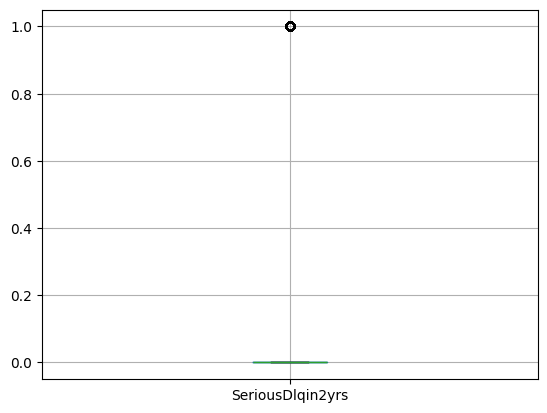

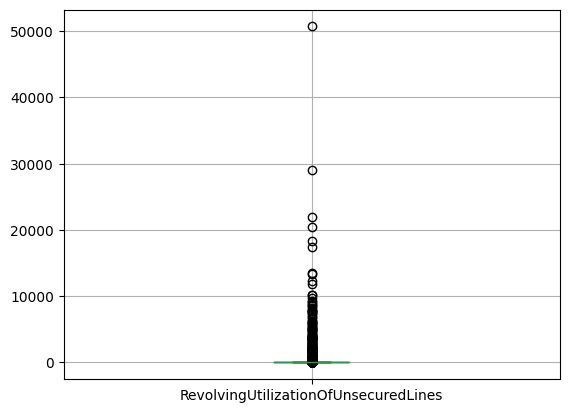

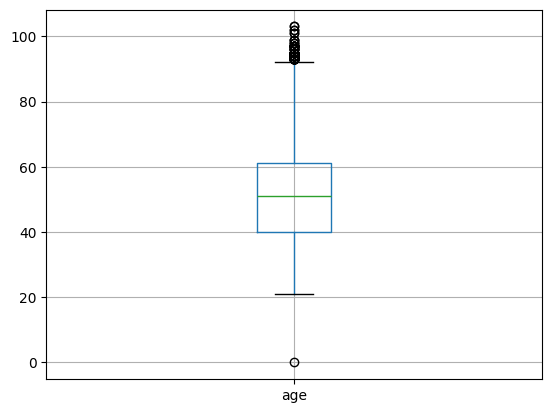

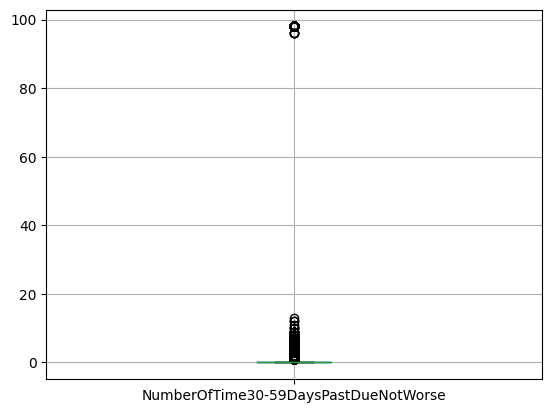

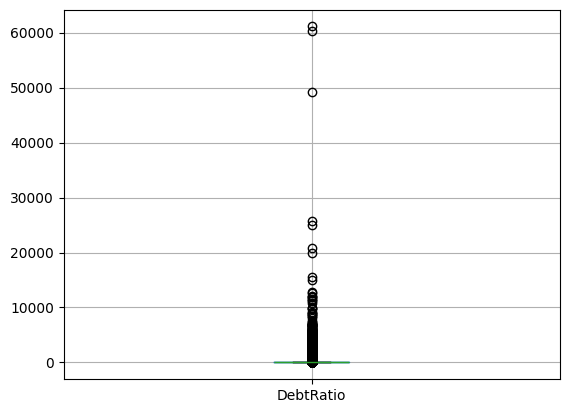

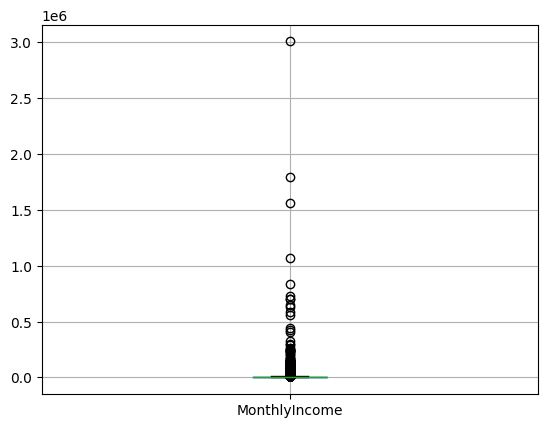

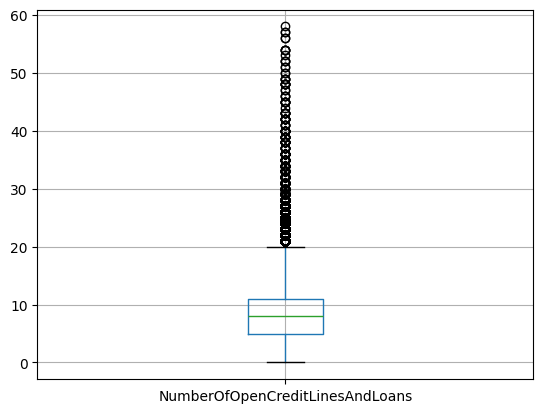

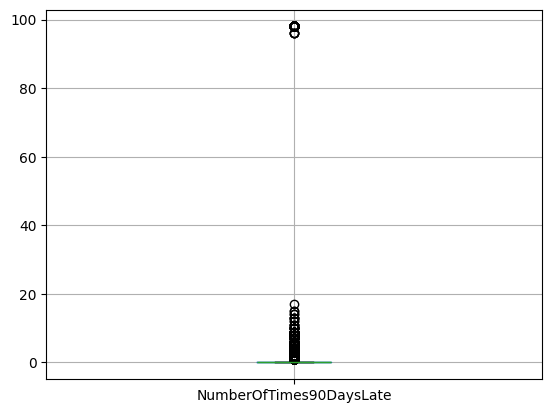

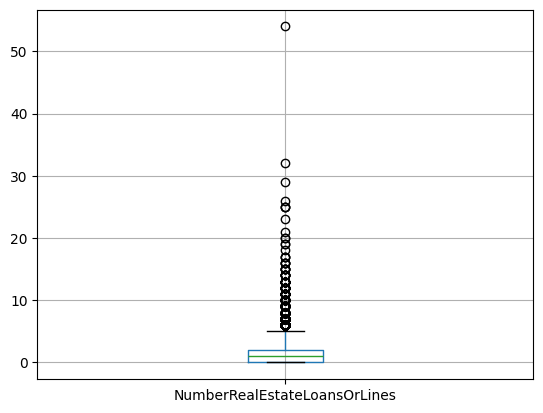

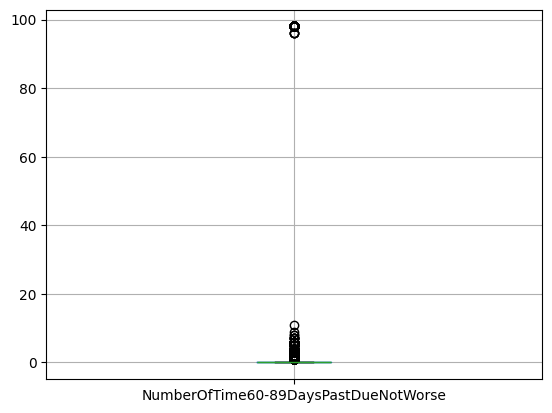

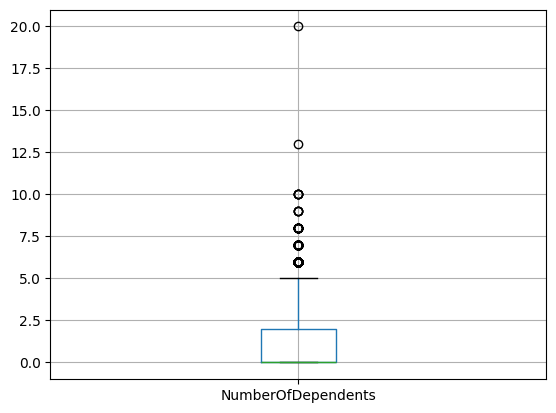

In [143]:
for col in data.columns:
    plt.subplots(1, 1)
    pd.DataFrame(data[col]).boxplot()
    plt.show()

## Удаляем выбросы

In [144]:
topline = data["age"].quantile(0.75) + (data["age"].quantile(0.75) - data["age"].quantile(0.25)) * 1.5 
downline = 20
data = data.drop(data["age"][data["age"] > topline].index)
data = data.drop(data["age"][data["age"] < downline].index)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Нормализация датасета

In [147]:
def normalizier(data):
    for col in data.columns:
        data[col] = (data[col] - data[col].mean())/data[col].std()
    return data

data = normalizier(data)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,3.658423,-0.019985,-0.434821,0.462159,-0.060978,0.170355,0.819431,-0.061175,4.301990,-0.054489,0.998924
2,-0.273340,-0.019242,-0.782795,-0.109120,-0.062599,-0.283065,-0.920348,-0.061175,-0.918165,-0.054489,0.128350
3,-0.273340,-0.020405,-0.921985,0.176520,-0.062686,-0.252327,-1.306966,0.227262,-0.918165,-0.054489,-0.742224
4,-0.273340,-0.022055,-1.478744,-0.109120,-0.062803,-0.234385,-0.727039,-0.061175,-0.918165,-0.054489,-0.742224
5,-0.273340,-0.019436,-0.156441,0.176520,-0.062829,3.958220,-0.340422,-0.061175,-0.048139,-0.054489,-0.742224
...,...,...,...,...,...,...,...,...,...,...,...
149995,-0.273340,-0.021464,-0.086847,-0.109120,-0.061927,-0.227431,-0.340422,-0.061175,-0.918165,-0.054489,-0.742224
149996,-0.273340,-0.022806,1.583430,-0.109120,-0.062353,-0.317837,-0.920348,-0.061175,-0.048139,-0.054489,-0.742224
149997,-0.273340,-0.021798,-0.504416,-0.109120,-0.061184,-0.075549,-0.920348,-0.061175,-0.048139,-0.054489,0.998924
149999,-0.273340,-0.022964,-1.478744,-0.109120,-0.062889,-0.066370,-0.920348,-0.061175,-0.918165,-0.054489,-0.742224


## Построим корреляционную матрицу

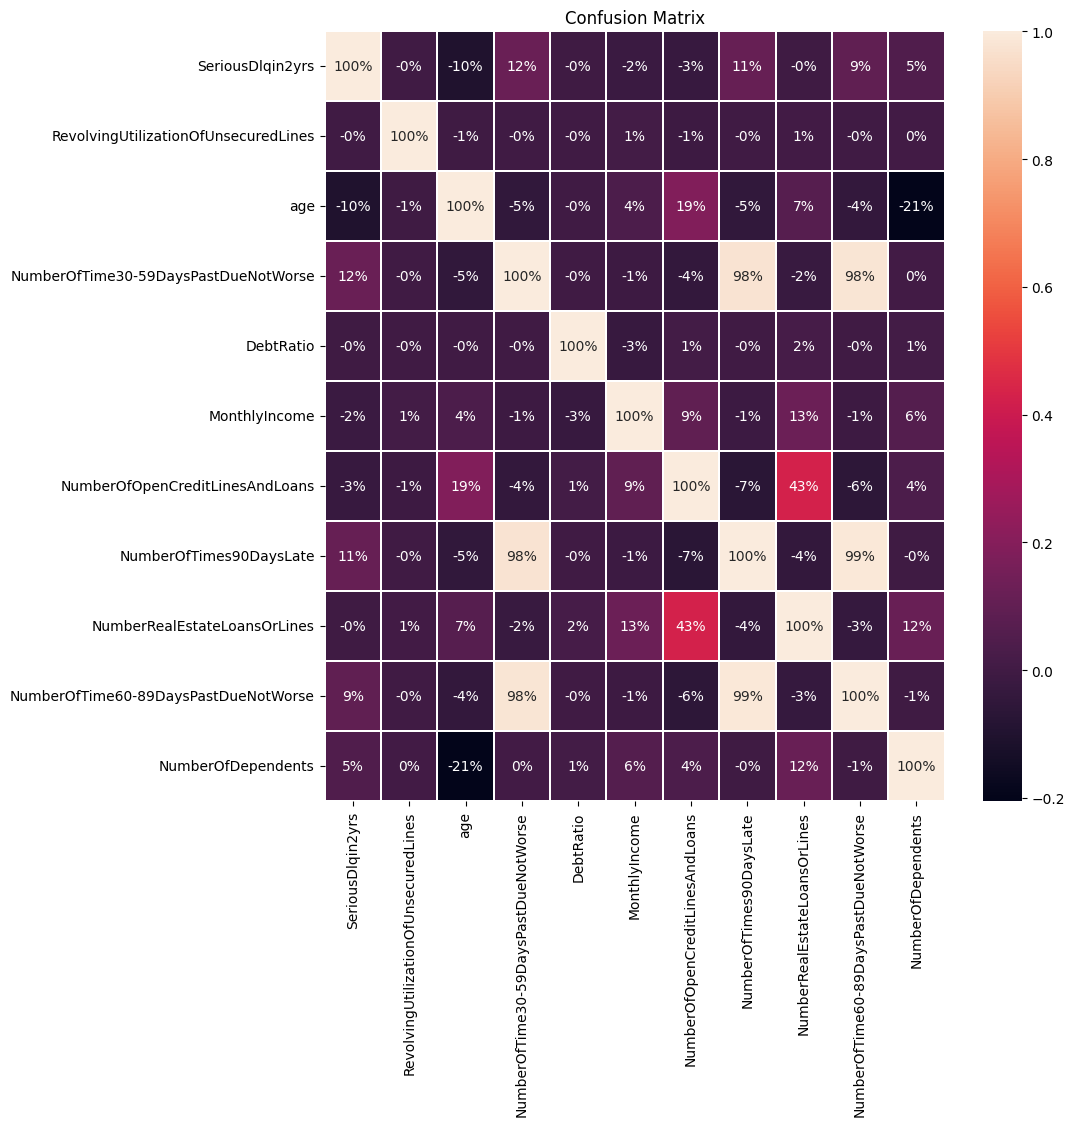

In [158]:
def draw_cov(data):
    figsize = (10,10)
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix')
    se.heatmap(data.cov(), annot=True, fmt="0.0%", linewidth=0.1)

draw_cov(data)

## Убираем признаки сильнокоррелирующие друг с другом

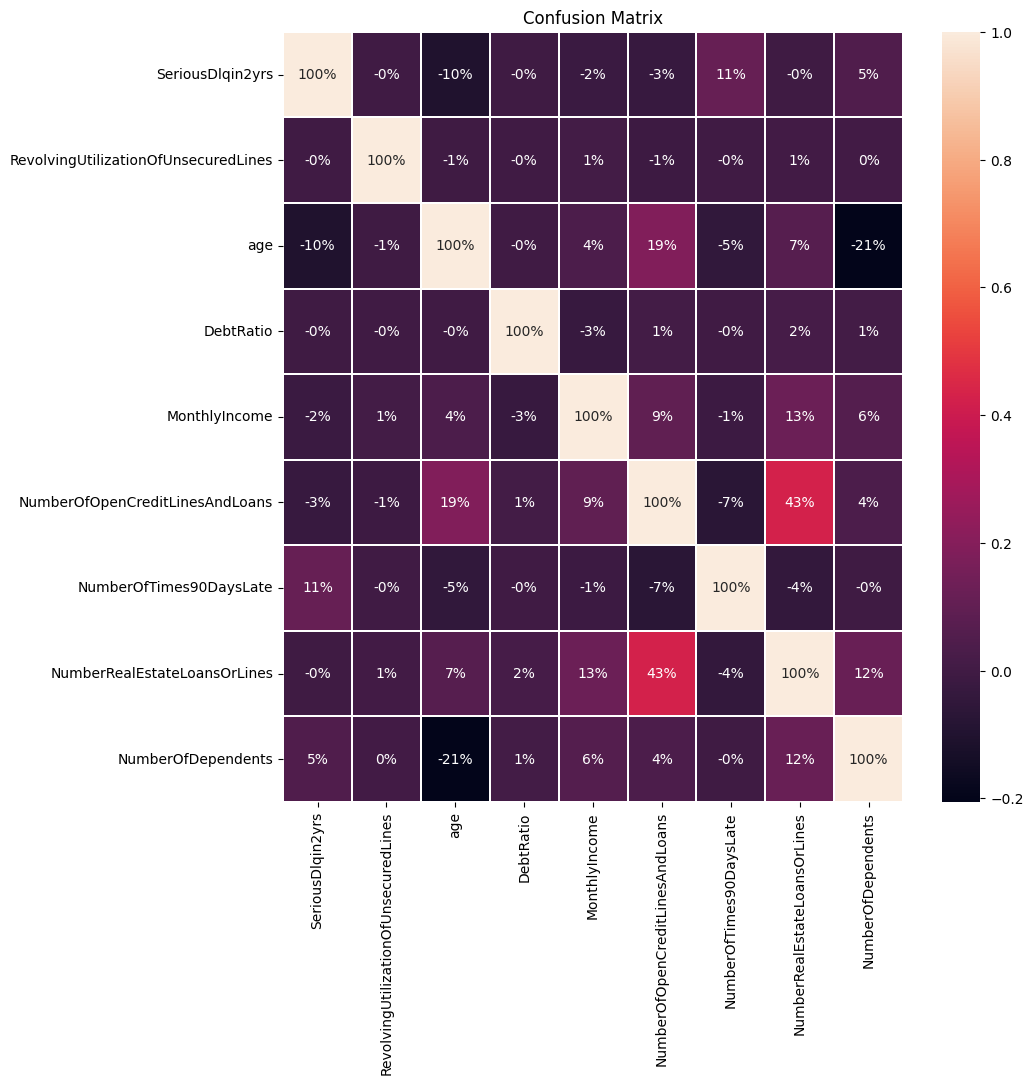

In [168]:
datacopy = copy.copy(data)
datacopy = datacopy.drop("NumberOfTime60-89DaysPastDueNotWorse", axis=1)
datacopy = datacopy.drop("NumberOfTime30-59DaysPastDueNotWorse", axis=1)
draw_cov(datacopy)